In [1]:
#import necessary libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#re-size all the images

IMAGE_SIZE = [224,224]

train_path = 'train'
valid_path = 'test'

In [3]:
#Import the ResNet50 library and add preprocessing layer to the front of ResNet 50
#Here we would be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
#don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
#useful for getting number of output classes
folders = glob('train/*')

In [7]:
folders

['train\\audi', 'train\\lamborghini', 'train\\mercedes']

In [8]:
#our layers
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

#create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
#view the structure of the model

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
#tell the model what cost and optimization method to use

model.compile(
loss='categorical_crossentropy', 
optimizer='adam',
metrics=['accuracy']
)

In [12]:
#Use the Image Data Generator to import the image from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#Make sure the same target size is provided as initialized for the image size
training_set = train_datagen.flow_from_directory('train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('test',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
#fit the model
#Run the cell 
r = model.fit_generator(
training_set,
validation_data=test_set,
epochs=50,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 7s 3s/step - loss: 3.9901 - accuracy: 0.2969 - val_loss: 16.5974 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 10.6599 - accuracy: 0.3906 - val_loss: 7.0411 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 3.7447 - accuracy: 0.3906 - val_loss: 3.9824 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 5s 2s/step - loss: 4.8069 - accuracy: 0.3438 - val_loss: 2.2277 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 5s 2s/step - loss: 1.8812 - accuracy: 0.4375 - val_loss: 3.9779 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 5s 2s/step - loss: 2.9461 - accuracy: 0.4531 - val_loss: 5.3639 - val_accuracy: 0.2931
Epoch 7/50
2/2 [==============================] - 5s 2s/step - loss: 2.9828 - accuracy: 0.5000 - val

In [17]:
r.history

{'loss': [3.990126848220825,
  10.659914016723633,
  3.7447495460510254,
  4.806927680969238,
  1.8812135457992554,
  2.946079730987549,
  2.982779026031494,
  1.1827188730239868,
  2.257026195526123,
  1.5770082473754883,
  1.4517388343811035,
  1.4359331130981445,
  0.7664501667022705,
  1.2614035606384277,
  0.8689090013504028,
  0.8494844436645508,
  0.4665514826774597,
  0.6852426528930664,
  0.46535518765449524,
  0.5448224544525146,
  0.4494505524635315,
  0.4385361075401306,
  0.36983177065849304,
  0.4062833786010742,
  0.4173508882522583,
  0.3632497191429138,
  0.31983861327171326,
  0.35071712732315063,
  0.33826926350593567,
  0.3451453149318695,
  0.3177827000617981,
  0.30562010407447815,
  0.2824670672416687,
  0.29823774099349976,
  0.2898903489112854,
  0.25830963253974915,
  0.23715278506278992,
  0.28304043412208557,
  0.2978594899177551,
  0.2790367007255554,
  0.2884941101074219,
  0.25315624475479126,
  0.2436220496892929,
  0.24300609529018402,
  0.2100062668323

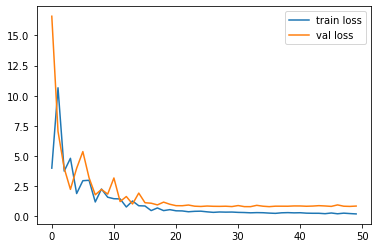

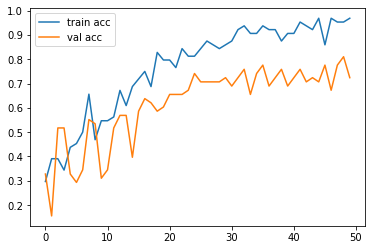

<Figure size 432x288 with 0 Axes>

In [18]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
#save as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[1.23372227e-02, 8.75305831e-01, 1.12357035e-01],
       [1.31948352e-01, 4.37046081e-01, 4.31005627e-01],
       [8.16053748e-01, 1.02459438e-01, 8.14868584e-02],
       [2.31386442e-02, 2.96767980e-01, 6.80093348e-01],
       [6.24047555e-02, 1.61434878e-02, 9.21451688e-01],
       [1.62488723e-03, 9.30776894e-01, 6.75983131e-02],
       [1.71123482e-02, 4.86118466e-01, 4.96769220e-01],
       [9.63904057e-03, 5.05930651e-03, 9.85301673e-01],
       [4.41341056e-03, 4.26039062e-02, 9.52982664e-01],
       [3.98737676e-02, 3.97105515e-01, 5.63020706e-01],
       [3.20226848e-02, 7.69015551e-01, 1.98961705e-01],
       [9.48774517e-01, 2.89428867e-02, 2.22826507e-02],
       [7.49856653e-03, 9.67576981e-01, 2.49244533e-02],
       [7.08686411e-01, 2.85111994e-01, 6.20155176e-03],
       [5.50039470e-01, 3.00197959e-01, 1.49762601e-01],
       [2.02868991e-02, 6.43872142e-01, 3.35841030e-01],
       [1.26672417e-01, 6.33945882e-01, 2.39381596e-01],
       [3.17246169e-02, 4.18447

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2], dtype=int64)

In [30]:
img=image.load_img('Test/lamborghini/11.jpg', target_size=(224,224))

In [31]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[0.01055621, 0.01553014, 0.9739136 ]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
a

array([2], dtype=int64)

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('model_resnet50.h5')